**Telecom Customer Churn**

---

# 1) IMPORTAR PAQUETES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2) ENTENDIENDO LA DATA

## 2.1) Cargando la data

In [0]:
# Seleccion de Variables a usar en este BASELINE:
features_iniciales = ['ID',
 'Sexo',
 'AdultoMayor',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ProteccionDispositivo',
 'SoporteTecnico',
 'FacturacionElectronica',
 'MontoCargadoMes']

In [0]:

path = "../input/"
df_train = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Churn/train_final.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Churn/test_final.csv')

In [0]:
df_train["MontoCargadoTotal"].replace(" ", np.nan, inplace=True)
df_train["MontoCargadoTotal"] = df_train["MontoCargadoTotal"].apply(float)

## 2.2) Exploración de la data

### 2.2.1) Estadísticos básicos

In [5]:
df_train.shape, df_test.shape

((4000, 21), (577, 20))

In [6]:
df_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID01802,Masculino,1.0,No,No,11.0,Si,Si,DSL,Si,Si,No,No,No,No,Mes a mes,No,Tarjeta de credito (automatico),60.25,662.95,0
1,ID05696,Masculino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,20.05,20.05,0
2,ID03166,Femenino,0.0,Si,Si,8.0,Si,No,Fibra Optica,No,No,Si,No,Si,Si,Mes a mes,Si,Checke por correo,94.20,777.30,1
3,ID00104,Masculino,0.0,Si,Si,50.0,No,Sin servicio telefonico,DSL,Si,No,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),39.45,2021.35,0
4,ID05060,Femenino,0.0,No,No,71.0,Si,Si,Fibra Optica,Si,Si,Si,Si,Si,Si,Bianual,Si,Checke por correo,118.65,NaN,0


In [7]:
df_test.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal
0,ID06207,Femenino,0.0,No,No,19.0,Si,Si,DSL,No,No,Si,No,No,No,Mes a mes,Si,Checke electronico,56.10,1033.90
1,ID01243,Masculino,0.0,Si,Si,64.0,Si,No,DSL,Si,No,Si,No,Si,Si,Anual,Si,Transferencia bancaria (automatico),73.05,4688.65
2,ID00206,Femenino,1.0,No,No,5.0,Si,No,Fibra Optica,No,No,Si,No,No,No,Mes a mes,Si,Transferencia bancaria (automatico),75.55,349.65
3,ID00127,Femenino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Transferencia bancaria (automatico),NaN,19.95
4,ID03521,Femenino,1.0,No,No,1.0,Si,Si,Fibra Optica,No,No,No,No,No,No,Mes a mes,Si,Checke por correo,72.10,72.10


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      4000 non-null   object 
 1   Sexo                    4000 non-null   object 
 2   AdultoMayor             3942 non-null   float64
 3   Socio                   3974 non-null   object 
 4   Dependientes            4000 non-null   object 
 5   MesesCliente            3996 non-null   float64
 6   ServicioTelefonico      4000 non-null   object 
 7   LineasMultiples         4000 non-null   object 
 8   ServicioInternet        4000 non-null   object 
 9   SeguridadOnline         3915 non-null   object 
 10  RespaldoOnline          3915 non-null   object 
 11  ProteccionDispositivo   3915 non-null   object 
 12  SoporteTecnico          3915 non-null   object 
 13  TransmisionTV           3915 non-null   object 
 14  TransmisionPeliculas    3915 non-null   

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      577 non-null    object 
 1   Sexo                    577 non-null    object 
 2   AdultoMayor             561 non-null    float64
 3   Socio                   574 non-null    object 
 4   Dependientes            577 non-null    object 
 5   MesesCliente            577 non-null    float64
 6   ServicioTelefonico      577 non-null    object 
 7   LineasMultiples         577 non-null    object 
 8   ServicioInternet        577 non-null    object 
 9   SeguridadOnline         568 non-null    object 
 10  RespaldoOnline          568 non-null    object 
 11  ProteccionDispositivo   568 non-null    object 
 12  SoporteTecnico          568 non-null    object 
 13  TransmisionTV           568 non-null    object 
 14  TransmisionPeliculas    568 non-null    ob

In [0]:
# Definiendo tipos
ID = 'ID'
TARGET = 'Churn'

In [11]:
# Distribución del Target
df_train[TARGET].value_counts(dropna=False)

0    2923
1    1077
Name: Churn, dtype: int64

In [12]:
df_train[TARGET].value_counts(dropna=False, normalize = True)*100

0    73.075
1    26.925
Name: Churn, dtype: float64

In [13]:
# Generar estadisticos básicos para cada variable:
### count: Count number of non-NA/null observations.	
### unique: Count uniques numbers of non-NA/null observations.
### top: Mean of the values.
### freq: Mean of the values.

### mean: Mean of the values.
### std: Standard deviation of the observations.

### min: Minimum of the values in the object.
### X%: The value of Quartil: 25% - Q1 , 50% - Q2, 75% - Q3
### max: Maximum of the values in the object.

df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(str) # Convertir a variable categorica
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4000,4000,ID04186,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,4000,2,Masculino,2036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,4000,3,0.0,3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Socio,3974,2,No,2093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,4000,2,No,2817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,3996,NaN,NaN,NaN,32.3396,24.7106,1,9,29,56,72
ServicioTelefonico,4000,2,Si,3607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,4000,3,No,1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,4000,3,Fibra Optica,1758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,3915,3,No,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(float) # Convertir a variable numerica

### 2.2.2) EDA (Exploratory Data Analysis)

#### 2.2.2.a) Evaluando Nulos

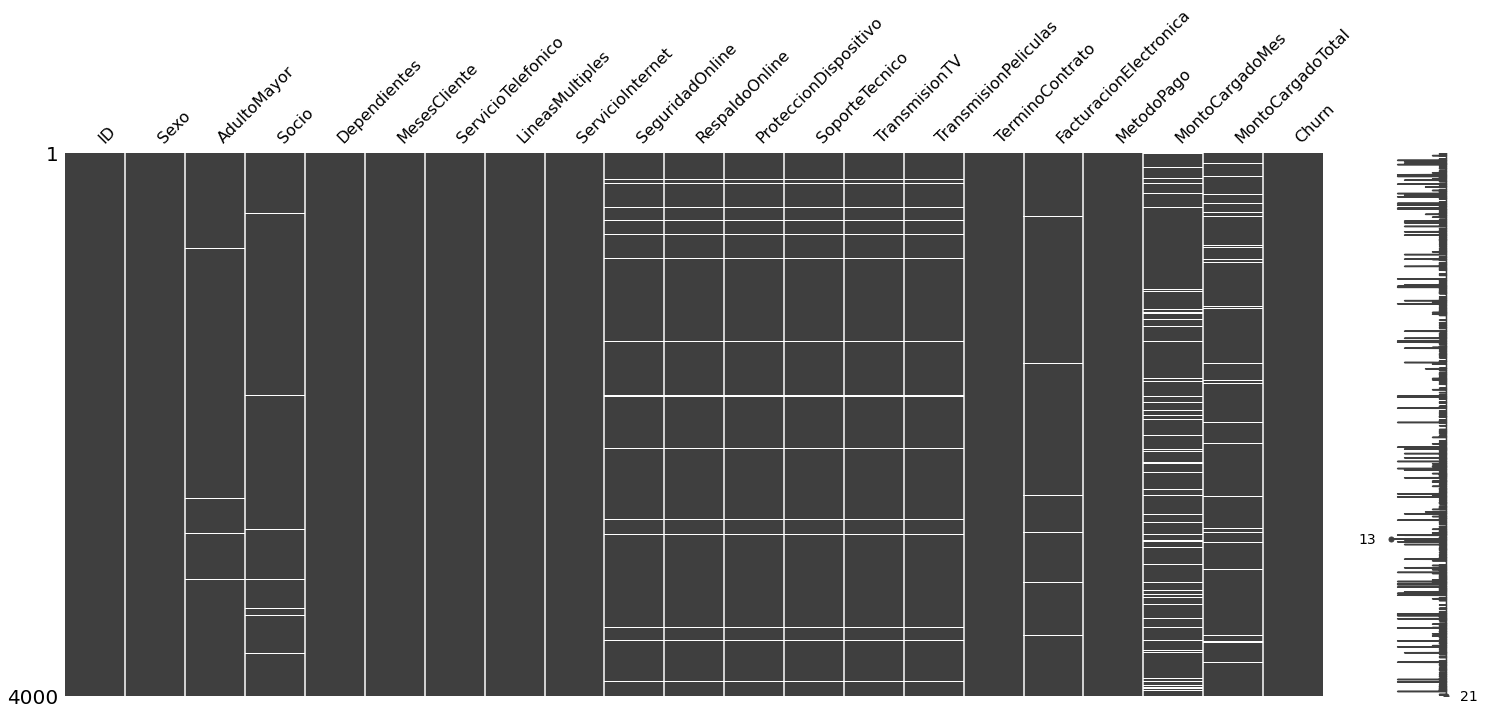

In [15]:
import missingno as msno
msno.matrix(df_train)

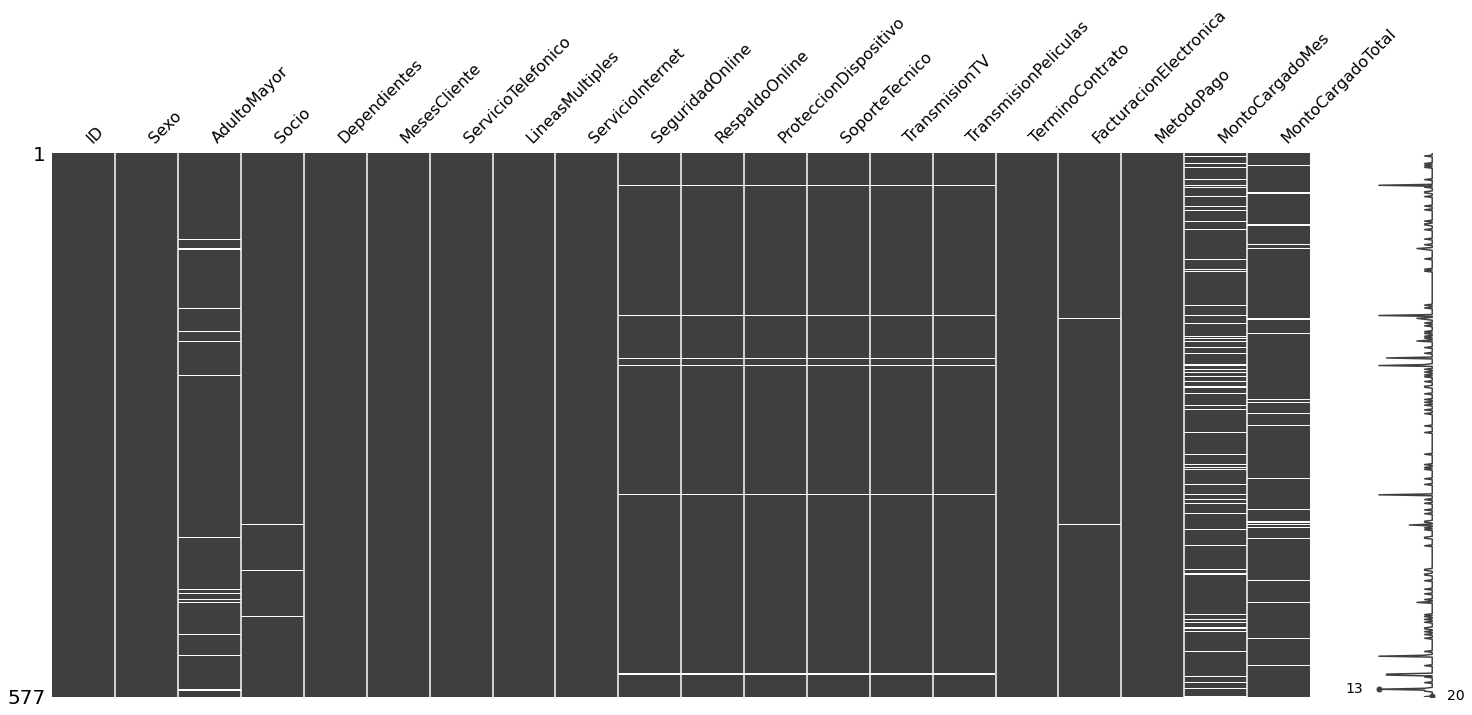

In [16]:
msno.matrix(df_test)

# 3) Preparación de la data

In [0]:
# Copy dataset and then apply transformation to copied dataset
ds_train = df_train.copy()

In [0]:
ds_test = df_test.copy()

## 3.1) Limpieza de los datos

### 3.1.1) Imputando Nulos

In [0]:
# AdultoMayor (imputacion por MODA)
ds_train["AdultoMayor"].fillna(0, inplace = True)
ds_test["AdultoMayor"].fillna(0, inplace = True)

# MesesCliente (imputacion por MEDIA)
ds_train["MesesCliente"].fillna(32, inplace = True)
ds_test["MesesCliente"].fillna(32, inplace = True)

# ProteccionDispositivo (imputacion por MODA)
ds_train["ProteccionDispositivo"].fillna('No', inplace = True)
ds_test["ProteccionDispositivo"].fillna('No', inplace = True)

# SoporteTecnico (imputacion por MODA)
ds_train["SoporteTecnico"].fillna('No', inplace = True)
ds_test["SoporteTecnico"].fillna('No', inplace = True)

# FacturacionElectronica (imputacion por MODA)
ds_train["FacturacionElectronica"].fillna('Si', inplace = True)
ds_test["FacturacionElectronica"].fillna('Si', inplace = True)

# MontoCargadoMes (imputacion por MEDIA)
ds_train["MontoCargadoMes"].fillna(68.7, inplace = True)
ds_test["MontoCargadoMes"].fillna(68.7, inplace = True)

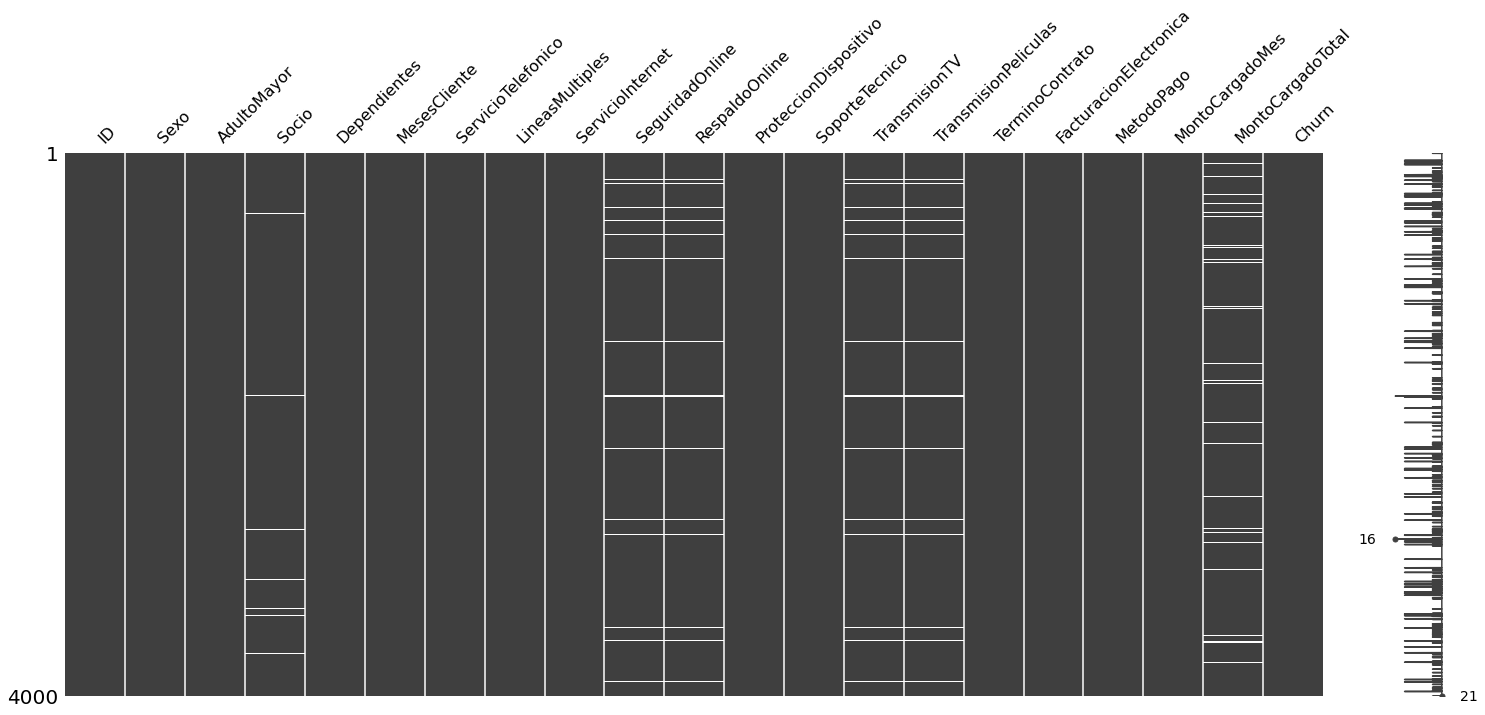

In [22]:
msno.matrix(ds_train)

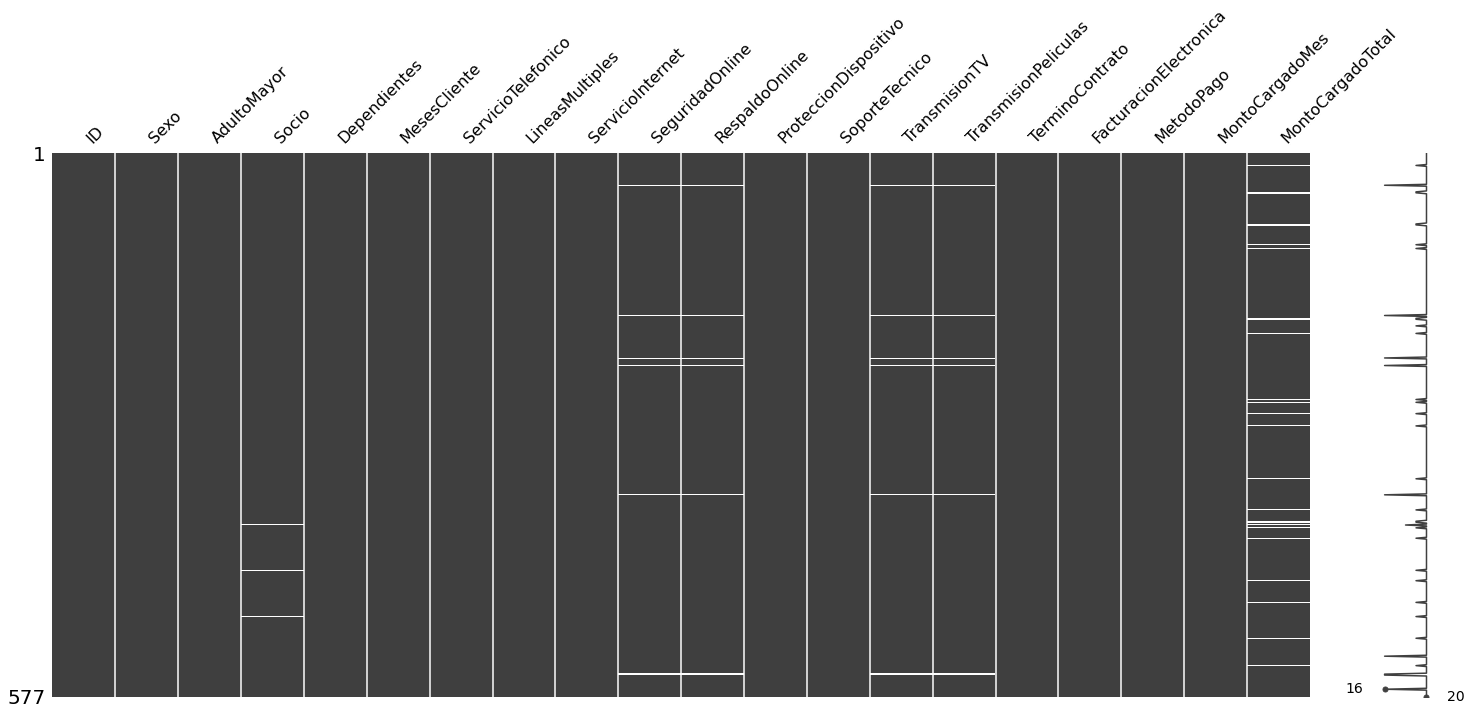

In [23]:
msno.matrix(ds_test)

### 3.1.2) Tratando outliers

In [0]:
None

## 3.2) Transformando la data (Encoding)

In [25]:
ds_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID01802,Masculino,1.0,No,No,11.0,Si,Si,DSL,Si,Si,No,No,No,No,Mes a mes,No,Tarjeta de credito (automatico),60.25,662.95,0
1,ID05696,Masculino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,20.05,20.05,0
2,ID03166,Femenino,0.0,Si,Si,8.0,Si,No,Fibra Optica,No,No,Si,No,Si,Si,Mes a mes,Si,Checke por correo,94.20,777.30,1
3,ID00104,Masculino,0.0,Si,Si,50.0,No,Sin servicio telefonico,DSL,Si,No,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),39.45,2021.35,0
4,ID05060,Femenino,0.0,No,No,71.0,Si,Si,Fibra Optica,Si,Si,Si,Si,Si,Si,Bianual,Si,Checke por correo,118.65,NaN,0


In [0]:
# Sexo 
dicc_sexo = {'Masculino': 1, 'Femenino':0 }
ds_train["Sexo"] = ds_train["Sexo"].map(dicc_sexo)
ds_test["Sexo"] = ds_test["Sexo"].map(dicc_sexo)

In [0]:
# ServicioTelefonico 
dicc_serv_telef = {'Si': 1, 'No':0 }
ds_train["ServicioTelefonico"] = ds_train["ServicioTelefonico"].map(dicc_serv_telef)
ds_test["ServicioTelefonico"] = ds_test["ServicioTelefonico"].map(dicc_serv_telef)

In [0]:
# LineasMultiples 
dicc_lin_mult = {'Si': 2, 'No':1, 'Sin servicio telefonico':0 }
ds_train["LineasMultiples"] = ds_train["LineasMultiples"].map(dicc_lin_mult)
ds_test["LineasMultiples"] = ds_test["LineasMultiples"].map(dicc_lin_mult)

In [0]:
# FacturacionElectronica 
dicc_fact_elect = {'Si': 1, 'No':0 }
ds_train["FacturacionElectronica"] = ds_train["FacturacionElectronica"].map(dicc_fact_elect)
ds_test["FacturacionElectronica"] = ds_test["FacturacionElectronica"].map(dicc_fact_elect)

In [0]:
# Crear Features Dummies
ds_train = pd.get_dummies(ds_train, columns=['ProteccionDispositivo','SoporteTecnico'])
ds_test = pd.get_dummies(ds_test, columns=['ProteccionDispositivo','SoporteTecnico'])

In [31]:
ds_train.head()
ds_test.columns

Index(['ID', 'Sexo', 'AdultoMayor', 'Socio', 'Dependientes', 'MesesCliente',
       'ServicioTelefonico', 'LineasMultiples', 'ServicioInternet',
       'SeguridadOnline', 'RespaldoOnline', 'TransmisionTV',
       'TransmisionPeliculas', 'TerminoContrato', 'FacturacionElectronica',
       'MetodoPago', 'MontoCargadoMes', 'MontoCargadoTotal',
       'ProteccionDispositivo_No', 'ProteccionDispositivo_Si',
       'ProteccionDispositivo_Sin servicio de internet', 'SoporteTecnico_No',
       'SoporteTecnico_Si', 'SoporteTecnico_Sin servicio de internet'],
      dtype='object')

### Encondeando nuestras variables:

In [0]:
lista_obj = []
lista_num = []
for col in ds_train.columns:
    if ds_train[col].dtype == 'object':
        lista_obj.append(col)
    else:
        lista_num.append(col)
        pass

In [33]:
lista_obj

['ID',
 'Socio',
 'Dependientes',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'MetodoPago']

In [34]:
lista_num.remove("Churn")
lista_num

['Sexo',
 'AdultoMayor',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'FacturacionElectronica',
 'MontoCargadoMes',
 'MontoCargadoTotal',
 'ProteccionDispositivo_No',
 'ProteccionDispositivo_Si',
 'ProteccionDispositivo_Sin servicio de internet',
 'SoporteTecnico_No',
 'SoporteTecnico_Si',
 'SoporteTecnico_Sin servicio de internet']

In [35]:
lista_obj.remove('ID')
lista_obj

['Socio',
 'Dependientes',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'MetodoPago']

In [36]:
ds_test

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,ProteccionDispositivo_No,ProteccionDispositivo_Si,ProteccionDispositivo_Sin servicio de internet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_Sin servicio de internet
0,ID06207,0,0.0,No,No,19.0,1,2,DSL,No,No,No,No,Mes a mes,1,Checke electronico,56.10,1033.90,0,1,0,1,0,0
1,ID01243,1,0.0,Si,Si,64.0,1,1,DSL,Si,No,Si,Si,Anual,1,Transferencia bancaria (automatico),73.05,4688.65,0,1,0,1,0,0
2,ID00206,0,1.0,No,No,5.0,1,1,Fibra Optica,No,No,No,No,Mes a mes,1,Transferencia bancaria (automatico),75.55,349.65,0,1,0,1,0,0
3,ID00127,0,0.0,No,No,1.0,1,1,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,0,Transferencia bancaria (automatico),68.70,19.95,0,0,1,0,0,1
4,ID03521,0,1.0,No,No,1.0,1,2,Fibra Optica,No,No,No,No,Mes a mes,1,Checke por correo,72.10,72.10,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,ID04327,0,0.0,No,No,17.0,1,1,Fibra Optica,No,No,No,No,Mes a mes,1,Checke por correo,70.00,1144.50,1,0,0,1,0,0
573,ID00917,1,0.0,Si,No,61.0,1,2,DSL,Si,No,No,Si,Bianual,0,Transferencia bancaria (automatico),75.35,4729.30,0,1,0,0,1,0
574,ID00621,1,0.0,Si,Si,55.0,1,1,DSL,No,No,No,No,Bianual,1,Transferencia bancaria (automatico),55.25,3119.90,0,1,0,0,1,0
575,ID05333,1,1.0,No,No,54.0,0,0,DSL,No,Si,Si,Si,Anual,1,Checke por correo,55.45,2966.95,0,1,0,1,0,0


In [0]:
ds_train.Socio = 0

In [0]:
dict_serv_int = {'DSL':0,'No':1,'Fibra Optica':2}
ds_train['ServicioInternet'] = ds_train.ServicioInternet.map(dict_serv_int)
ds_test['ServicioInternet'] = ds_test.ServicioInternet.map(dict_serv_int)

In [0]:
ds_train['TransmisionTV'].fillna('No',inplace=True)
ds_test['TransmisionTV'].fillna('No',inplace=True)

In [0]:
def replace_my_null(df, list_obj, list_num):
    for col_obj in list_obj:
        if df[col_obj].isna().any():
            moda = df[col_obj].mode()[0]
            df[col_obj].fillna(moda, inplace=True)
        else:
            pass
    for col_num in list_num:        
        if df[col_num].isna().any():
            df[col_num].fillna(df[col_num].mean(),inplace=True)

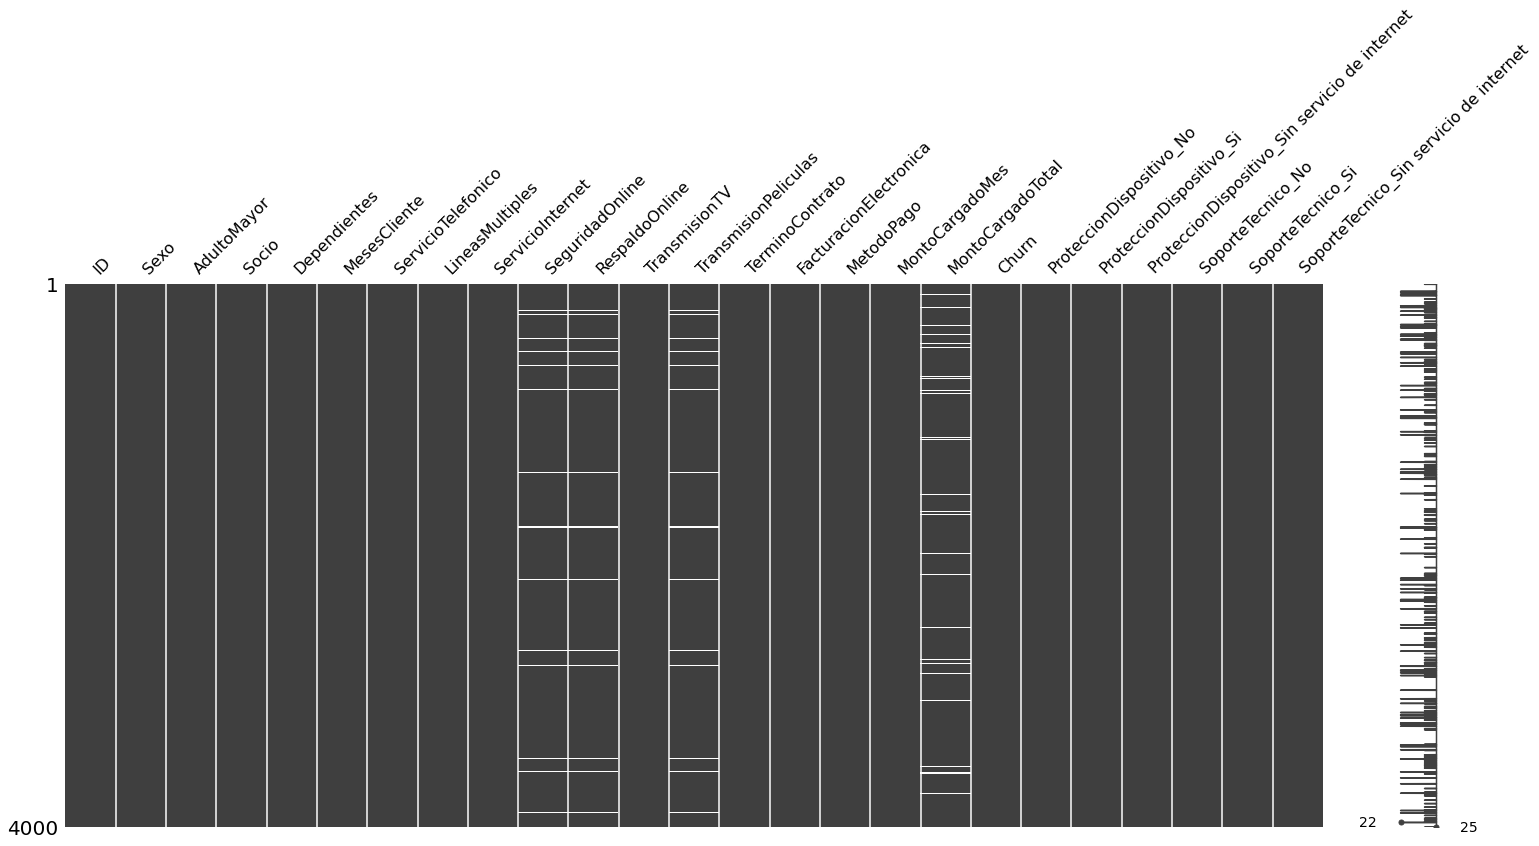

In [41]:
msno.matrix(ds_train)

In [0]:
replace_my_null(ds_train, lista_obj, lista_num)
replace_my_null(ds_test, lista_obj, lista_num)

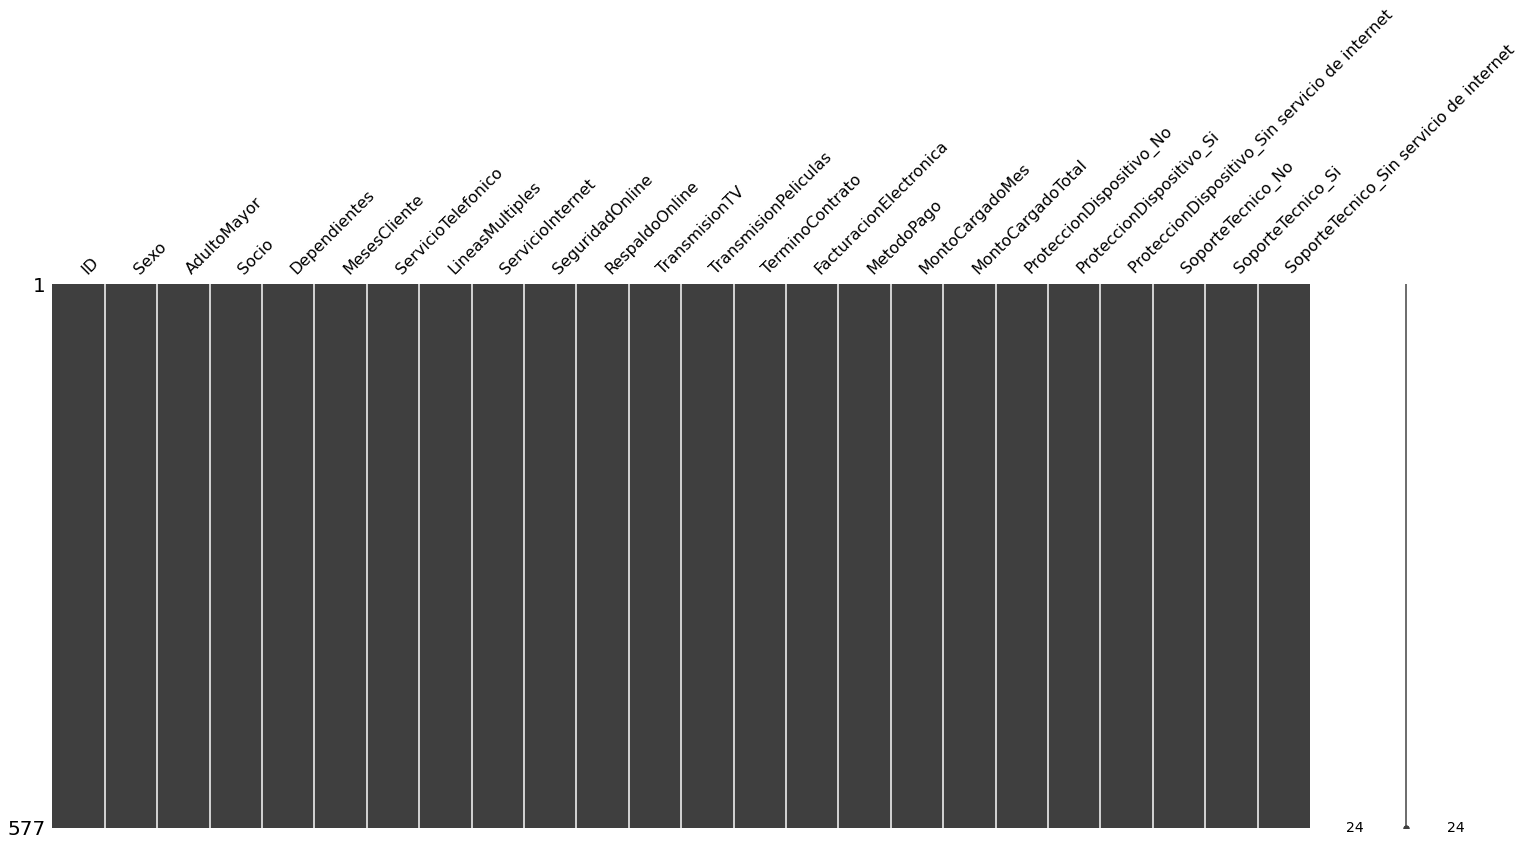

In [43]:
msno.matrix(ds_test)

## 3.3) Feature Engineering

In [44]:
# New Feature 1
tmp_byAdultoMayor_medianMontoMes = ds_train.groupby(['AdultoMayor'])['MontoCargadoMes'].median().round()
tmp_byAdultoMayor_medianMontoMes

AdultoMayor
0.0    69.0
1.0    85.0
Name: MontoCargadoMes, dtype: float64

In [0]:
ds_train['flg_bySexo_mayorMedianMontoMes'] = ds_train.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

ds_test['flg_bySexo_mayorMedianMontoMes'] = ds_test.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

In [46]:
ds_train.head(10)

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn,ProteccionDispositivo_No,ProteccionDispositivo_Si,ProteccionDispositivo_Sin servicio de internet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_Sin servicio de internet,flg_bySexo_mayorMedianMontoMes
0,ID01802,1,1.0,0,No,11.0,1,2,0,Si,Si,No,No,Mes a mes,0,Tarjeta de credito (automatico),60.25,662.95000,0,1,0,0,1,0,0,0
1,ID05696,1,0.0,0,No,1.0,1,1,1,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,0,Checke electronico,20.05,20.05000,0,0,0,1,0,0,1,0
2,ID03166,0,0.0,0,Si,8.0,1,1,2,No,No,Si,Si,Mes a mes,1,Checke por correo,94.20,777.30000,1,0,1,0,1,0,0,1
3,ID00104,1,0.0,0,Si,50.0,0,0,0,Si,No,Si,No,Mes a mes,1,Transferencia bancaria (automatico),39.45,2021.35000,0,1,0,0,1,0,0,0
4,ID05060,0,0.0,0,No,71.0,1,2,2,Si,Si,Si,Si,Bianual,1,Checke por correo,118.65,1998.02664,0,0,1,0,0,1,0,1
5,ID03313,0,0.0,0,Si,35.0,1,1,2,Si,No,Si,Si,Mes a mes,1,Checke por correo,106.90,3756.45000,0,0,1,0,0,1,0,1
6,ID04147,0,1.0,0,No,11.0,1,2,0,Si,No,No,No,Mes a mes,1,Checke por correo,55.60,580.80000,0,1,0,0,1,0,0,0
7,ID05700,1,0.0,0,No,1.0,1,1,1,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,0,Checke electronico,20.10,20.10000,1,0,0,1,0,0,1,0
8,ID01972,0,0.0,0,No,32.0,1,1,2,No,Si,No,Si,Mes a mes,0,Tarjeta de credito (automatico),84.15,2585.95000,1,1,0,0,1,0,0,1
9,ID00184,0,0.0,0,No,4.0,1,1,1,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,1,Transferencia bancaria (automatico),20.15,68.45000,0,0,0,1,0,0,1,0


In [0]:
# New Feature 2,3,4, ...
### Here

In [48]:
ds_train['MontoCargadoTotal'].isna().sum()

0

## 3.4) Seleccion de features

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in lista_obj:
    ds_train[col] = le.fit_transform(ds_train[col].values)
    ds_test[col] = le.fit_transform(ds_test[col].values)

In [50]:
features_to_model = list(ds_train.columns)

features_to_model.remove(TARGET) # Eliminar variable Target
features_to_model.remove(ID) # Eliminar variable ID

list(features_to_model)

['Sexo',
 'AdultoMayor',
 'Socio',
 'Dependientes',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago',
 'MontoCargadoMes',
 'MontoCargadoTotal',
 'ProteccionDispositivo_No',
 'ProteccionDispositivo_Si',
 'ProteccionDispositivo_Sin servicio de internet',
 'SoporteTecnico_No',
 'SoporteTecnico_Si',
 'SoporteTecnico_Sin servicio de internet',
 'flg_bySexo_mayorMedianMontoMes']

***Select Final Features:***

In [0]:
# Selección de variables. 
### Una opción es: en base a un modelo basado en árboles, generar la importancia de Variables y seleccionar los features mas importantes.
features_to_model = features_to_model # ['var1', 'var2', 'varn'] 

In [52]:
len(features_to_model)

24

In [0]:
# Features & Target
X = ds_train[features_to_model]
y = ds_train[TARGET]

X_summit = ds_test[features_to_model]

In [54]:
print("train: ", X.shape,", summit: ", X_summit.shape)

train:  (4000, 24) , summit:  (577, 24)


## 3.5) Haciendo nuestra data de train y test

In [55]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.70, random_state=9)
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(2800, 2800) (1200, 1200)


In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 2726 to 382
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Sexo                                            2800 non-null   int64  
 1   AdultoMayor                                     2800 non-null   float64
 2   Socio                                           2800 non-null   int64  
 3   Dependientes                                    2800 non-null   int64  
 4   MesesCliente                                    2800 non-null   float64
 5   ServicioTelefonico                              2800 non-null   int64  
 6   LineasMultiples                                 2800 non-null   int64  
 7   ServicioInternet                                2800 non-null   int64  
 8   SeguridadOnline                                 2800 non-null   int64  
 9   RespaldoOnline                         

# 4) Evaluando nuestro modelo de forma simple

- En este caso la optimización de los será opcional.

In [0]:
from sklearn.model_selection import GridSearchCV

## 4.1.A. LogisticRegression

### 4.1.1 Training

In [0]:
from sklearn.linear_model import LogisticRegression

In [59]:
# Crear objeto del modelo
model_rlog = LogisticRegression()

params = {'C':[1,3,4,5,6]}

searcher_lg = GridSearchCV(model_rlog, params, cv=5)

searcher_lg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(searcher_lg.best_estimator_.coef_[0],4) })
df_weights

,feature,beta
0,Sexo,-0.0811
1,AdultoMayor,0.4216
2,Socio,0.0000
3,Dependientes,-0.4341
4,MesesCliente,-0.0522
5,ServicioTelefonico,-0.5787
6,LineasMultiples,-0.0024
7,ServicioInternet,0.3927
8,SeguridadOnline,-0.7627
9,RespaldoOnline,-0.2809


### 4.1.2 Evaluación del Modelo

In [0]:
# Generar las predicciones:
y_pred_train = searcher_lg.predict(X_train)
y_pred_test = searcher_lg.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = searcher_lg.predict_proba(X_train)[:,1]
y_pred_proba_test = searcher_lg.predict_proba(X_test)[:,1]

In [62]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8017857142857143
Accuracy - Test : 0.815


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [0]:
list_accuracy_test = []
for threshold in range(0,100):
    pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
    list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

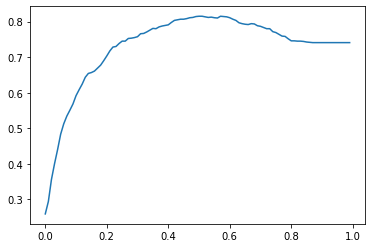

In [64]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [65]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.5


In [66]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8017857142857143
Accuracy - Test : 0.815


## 4.1.B. Árbol de decisión

### 4.1.1 Training

In [67]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Create  model objet 
model_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5,random_state=0)

# Fit the model:
model_tree.fit(X_train, y_train)

model = model_tree

### 4.1.2 Evaluación del Modelo

In [0]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [70]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8182142857142857
Accuracy - Test : 0.8041666666666667


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### Feature Importances

In [71]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,TerminoContrato,0.445221
1,MesesCliente,0.173652
2,ServicioInternet,0.138984
3,MontoCargadoMes,0.072944
4,MontoCargadoTotal,0.059954
5,SoporteTecnico_No,0.024687
6,SeguridadOnline,0.021957
7,MetodoPago,0.013487
8,FacturacionElectronica,0.013441
9,TransmisionTV,0.010221


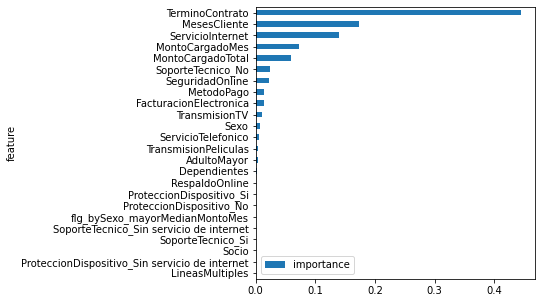

In [72]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

## 4.1.C. Random Forest

### 4.1.1 Training

In [73]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Create  model objet 
model_rf = RandomForestClassifier(n_estimators = 150, random_state = 0, max_depth=5, 
                                  max_features = 0.5, min_samples_leaf = 10, 
                                  n_jobs = -1)

# Fit the model:
model_rf.fit(X_train, y_train)

model = model_rf

### 4.1.2 Evaluación del Modelo

In [0]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [76]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8185714285714286
Accuracy - Test : 0.8033333333333333


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### Feature Importances

In [77]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,TerminoContrato,0.289766
1,MesesCliente,0.208743
2,ServicioInternet,0.113845
3,SeguridadOnline,0.090049
4,MontoCargadoTotal,0.086821
5,MontoCargadoMes,0.078109
6,SoporteTecnico_No,0.046010
7,MetodoPago,0.012857
8,FacturacionElectronica,0.010884
9,RespaldoOnline,0.009547


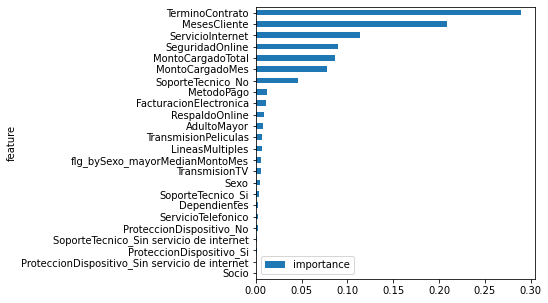

In [78]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

**MODELO FINAL**

Como se puede notar, de los 3 tipos de algoritmos entrenados, el modelo basado en Random Forrest es el ganador con un accuracy optimizado por el punto de corte (threhold: 0.36)

# Predicciones on Submission DS

In [0]:
pred_prob_subm = model_rf.predict_proba(X_summit)[:,1]
pred_subm = [1 if x >= best_threshold else 0 for x in pred_prob_subm]

In [80]:
Y_summit_pred = pd.DataFrame()
Y_summit_pred[ID] = df_test[ID]
Y_summit_pred[TARGET] = pred_subm #pred_prob_subm
Y_summit_pred.head()

,ID,Churn
0,ID06207,0
1,ID01243,0
2,ID00206,1
3,ID00127,0
4,ID03521,1


To submission:

In [0]:
Y_summit_pred.to_csv("krfc_submission_01_baseline.csv", index = False)